In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

# Importing all the required python modules

In [2]:
# Reading the dataset
df = pd.read_csv('Real_fake_news.csv')

<h3>Data Exploration</h3>

In [3]:
# Head function will show us the top records of the dataset. By default python shows the top 5 records.
df.head()

,Unnamed: 0,Unnamed: 0.1,author,statement,source,target,BinaryTarget,BinaryNumTarget
0,0,0,Jill Terreri,"New York is ""leading the nation with the lowes...",NYS Department of Corrections and Community Su...,True,REAL,1
1,1,1,Eleanor Hildebrandt,“Iowa ranks 45th in the U.S. for internet conn...,Cindy Axne,True,REAL,1
2,2,2,Emily Zirkelbach,“FUN FACT: West Virginia is home to zero billi...,David Gura,True,REAL,1
3,3,3,Madeline Heim,Says gubernatorial candidate Rebecca Kleefisch...,Kelda Helen Roys,True,REAL,1
4,4,4,Sabine Martin,"The Biden administration ""published a study co...",Randy Feenstra,True,REAL,1


In [4]:
# Tail function will show you the last 5 records of the dataset.
df.tail()

,Unnamed: 0,Unnamed: 0.1,author,statement,source,target,BinaryTarget,BinaryNumTarget
4865,2431,2431,Bill McCarthy,"""Clinton campaign official arrested by FBI on ...",Bloggers,False,FAKE,0
4866,2432,2432,Miriam Valverde,"""Our courts find that 80 percent of those who ...",Jeff Sessions,False,FAKE,0
4867,2433,2433,Kiannah Sepeda-Miller,Says a progressive income tax proposal from De...,Evelyn Sanguinetti,False,FAKE,0
4868,2434,2434,Manuela Tobias,"""Maxine Waters Is Getting Criminally Charged!""",Bloggers,False,FAKE,0
4869,2435,2435,Bill McCarthy,"""Twitter caught leaking Donald Trump’s private...",Bloggers,False,FAKE,0


In [5]:
# It returns the column labels of the given dataframe.
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'author', 'statement', 'source', 'target',
       'BinaryTarget', 'BinaryNumTarget'],
      dtype='object')

In [6]:
# Identifying the datatype for every Variable
df.dtypes

Unnamed: 0          int64
Unnamed: 0.1        int64
author             object
statement          object
source             object
target               bool
BinaryTarget       object
BinaryNumTarget     int64
dtype: object

<h3>Data Cleaning and Visualization</h3>

In [7]:
# Removing the columns that are not required, Unnamed has no significance and response is a duplicate for response_binary
df.drop(['Unnamed: 0','Unnamed: 0.1'], axis=1, inplace=True)

In [8]:
# Using df.info() to check if any null value present
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4870 entries, 0 to 4869
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   author           4870 non-null   object
 1   statement        4870 non-null   object
 2   source           4870 non-null   object
 3   target           4870 non-null   bool  
 4   BinaryTarget     4870 non-null   object
 5   BinaryNumTarget  4870 non-null   int64 
dtypes: bool(1), int64(1), object(4)
memory usage: 195.1+ KB


In [9]:
# Describe is used to view some basic statistical details like, percentile, mean, standard deviation, etc of the given dataframe.
df.describe(include = "all")

,author,statement,source,target,BinaryTarget,BinaryNumTarget
count,4870,4870,4870,4870,4870,4870.000000
unique,318,4866,1493,2,2,NaN
top,Ciara O'Rourke,Says Milken Institute rated San Antonio as nat...,Facebook posts,False,REAL,NaN
freq,669,2,838,2435,2435,NaN
mean,NaN,NaN,NaN,NaN,NaN,0.500000
std,NaN,NaN,NaN,NaN,NaN,0.500051
min,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,0.500000
75%,NaN,NaN,NaN,NaN,NaN,1.000000


In [12]:
# We will check for any duplicate records in the data. We will remove this data from the data set so that we get only distinct records.
duplicate=df.duplicated()
print(duplicate.sum())
df[duplicate]

0


,author,statement,source,target,BinaryTarget,BinaryNumTarget


In [11]:
df = df.drop_duplicates(subset = None, keep ='first')

In [13]:
# Dropping the rows with null values
df.dropna()

,author,statement,source,target,BinaryTarget,BinaryNumTarget
0,Jill Terreri,"New York is ""leading the nation with the lowes...",NYS Department of Corrections and Community Su...,True,REAL,1
1,Eleanor Hildebrandt,“Iowa ranks 45th in the U.S. for internet conn...,Cindy Axne,True,REAL,1
2,Emily Zirkelbach,“FUN FACT: West Virginia is home to zero billi...,David Gura,True,REAL,1
3,Madeline Heim,Says gubernatorial candidate Rebecca Kleefisch...,Kelda Helen Roys,True,REAL,1
4,Sabine Martin,"The Biden administration ""published a study co...",Randy Feenstra,True,REAL,1
...,...,...,...,...,...,...
4865,Bill McCarthy,"""Clinton campaign official arrested by FBI on ...",Bloggers,False,FAKE,0
4866,Miriam Valverde,"""Our courts find that 80 percent of those who ...",Jeff Sessions,False,FAKE,0
4867,Kiannah Sepeda-Miller,Says a progressive income tax proposal from De...,Evelyn Sanguinetti,False,FAKE,0
4868,Manuela Tobias,"""Maxine Waters Is Getting Criminally Charged!""",Bloggers,False,FAKE,0


In [14]:
# Correlation Matrix to check if any two collumn are correlated and can be removed.
df.corr()

,target,BinaryNumTarget
target,1.0,1.0
BinaryNumTarget,1.0,1.0


In [15]:
# Defining numerical and categorical variables
num_atr=[]

cat_atr=['author' , 'statement' , 'source']

<AxesSubplot:>

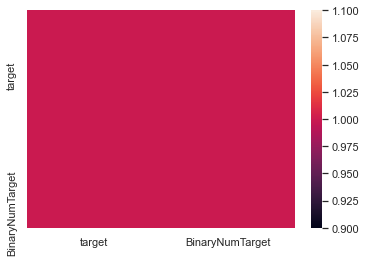

In [17]:
df_corr=df.corr()
sns.heatmap(df_corr)
# Response of the customers is highly dependent on duration of the contact

<h3>KNN Classification Algorithm</h3>

In [18]:
# Dividing the dataset into independent variables and target variables
X= df.drop(['BinaryNumTarget', 'BinaryTarget', 'target'], axis=1)
y= df['BinaryNumTarget']

In [19]:
# Dividing the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [20]:
X_train.head()
# Training dataset contain a lot of categorical values which needs to be converted into numerical values to apply KNN classifier

,author,statement,source
338,Dan Clark,After the minimum wage for tipped workers was ...,James Tedisco
260,Chris Nichols,"""More than a million Californians"" do not have...",Gavin Newsom
4517,Ciara O'Rourke,"Says John Wayne said, ""If you don’t want an Am...",Viral image
719,Linda Qiu,"In 2008, then-Sen. Barack Obama ""missed 60 or ...",Marco Rubio
4807,Louis Jacobson,"""Someone can write an article or book, totally...",Donald Trump


In [21]:
# Using LabelEncoder to convert categorical values into numerical values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_train[cat_atr] = X_train[cat_atr].apply(le.fit_transform)
X_train[cat_atr].head()

C:\Users\Yogesh\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,author,statement,source
338,63,1331,456
260,52,530,374
4517,55,2214,1179
719,160,1602,725
4807,164,755,305


In [24]:
a1 = X_train[cat_atr]
#b1 = stds.transform(X_train[num_atr])

#x_train = np.hstack([a1,b1])
x_train = np.hstack([a1])

In [25]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [26]:
# As testing dataset also contain categorical values it also needs to be converted into numerical values to apply KNN classifier
# Using LabelEncoder to convert categorical values of testing into numerical values

X_test[cat_atr] = X_test[cat_atr].apply(le.fit_transform)
X_test[cat_atr].head()

C:\Users\Yogesh\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,author,statement,source
4621,97,466,16
2774,120,1030,158
248,75,488,282
517,118,333,189
3441,128,41,158


In [28]:
# Using StandardScaler for normal distribution of numerical data in testing data
#stds.fit_transform(X_test[num_atr])

In [29]:
a2 = X_test[cat_atr]
#b2 = stds.transform(X_test[num_atr])

#x_test = np.hstack([a2,b2])
x_test = np.hstack([a2])

In [30]:
# predicting the values now using testing data
y_pred = knn.predict(x_test)

In [31]:
#Checking the predicted values
y_pred

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

<h3>Performance measures for KNN Classifier Algorithm</h3>

In [32]:
#Using confussion matrix to compare predicted values of target varable with testing values of target variable
confusion_matrix(y_test, y_pred)

array([[ 71, 534],
       [135, 477]], dtype=int64)

In [33]:
# Checking the accuracy of algorithm
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)
# Getting 45.02% accuracy

0.45028759244042726

In [34]:
# Calculating precision_score
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.47181008902077154

In [35]:
# Calculating recall_score
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.7794117647058824

In [36]:
# Calculating f1_score
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.5878003696857671

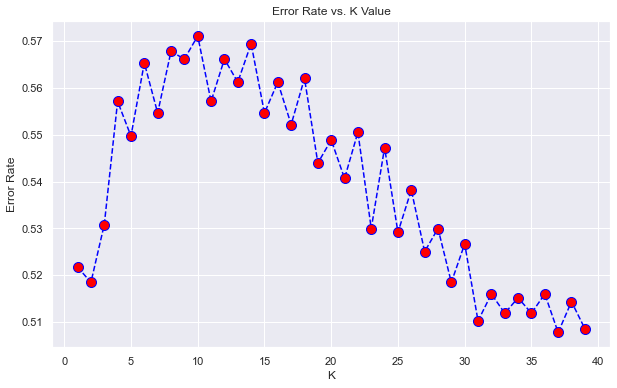

Minimum error:- 0.5078060805258833 at K = 37


In [37]:
# Plotting graph for 'Error Rate vs. K Value' to check most accurate K value
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(x_train,y_train)
 pred_i = knn.predict(x_test)
 #print (pred_i)
 #print (1-accuracy_score(y_test, pred_i))
 error_rate.append(1-accuracy_score(y_test, pred_i))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [38]:
# Using nearest value as 9 to predict the values again
knn = KNeighborsClassifier(n_neighbors=37, metric='euclidean')
knn.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=37)

In [39]:
# predicting the values after setting n_neighbors=9
y_pred = knn.predict(x_test)

In [40]:
# Checking the accuracy of algorithm
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)
# Accuracy improved from 45.02% to 49.02%

0.49219391947411667